In [1]:
import sys
import os
import pandas as pd
import networkx as nx

# Get the parent directory of your current directory
parent_dir = os.path.dirname(os.getcwd())

# Add the parent directory to the sys.path
sys.path.append(parent_dir)

# Now you can import your module as usual
from SimulationRL import *
import SimulationRL

populationMap   = '../Population Map/gpw_v4_population_count_rev11_2020_15_min.tif'
outputPath      = './GlobalLinks/'
inputPath       = '../'
matching        = 'Greedy' # ['Markovian', 'Greedy']

No GPU available


In [2]:
# import sys
# sys.path.insert(1, './../Mathias_Code')
# from Simulation import *

In [6]:
inputParams = pd.read_csv(inputPath + "inputRL.csv")

locations = inputParams['Locations'].copy()
print('Nº of Gateways: ' + str(len(locations)))


env = simpy.Environment()
rKM        = 500   # Coverage radio of the ground terminals
population_data = './../gpw/count/gpw_v4_population_count_rev11_2020_15_min.tif'
GT_data         = './../Mathias_Code/GroundTerminals.csv'
constellation = 'kepler'
# earth = initialize(env, population_data, GT_data,rKM, constellation)
earth, _, _, _ = initialize(env, populationMap, inputPath + 'Gateways.csv', rKM, inputParams, movementTime, locations, outputPath, matching='Greedy')


Nº of Gateways: 18
Using Kepler constellation design
total divisions in x = 1440
 total divisions in y = 720
 total cells = 1036800
 window of operation (longitudes) = (0, 1440)
 window of operation (latitudes) = (0, 720)

Finding cells within coverage area of GT 18 of 18
Time taken to find cells that are within range of all GTs: 4.23552680015564 seconds
Time taken to add cell information to all GTs: 0.18911099433898926 seconds

Matching: Greedy
----------------------------------
Removing duplicated links...
0_1 east satellite duplicated: 6_19, 1_1
Keeping most horizontal link: 1_1
0_1 east satellite duplicated: 1_1, 3_0
Keeping most horizontal link: 1_1
0_2 West satellite duplicated: 6_17, 6_18
Keeping most horizontal link: 6_18
0_2 east satellite duplicated: 1_2, 6_19
Keeping most horizontal link: 1_2
0_3 West satellite duplicated: 6_16, 6_17
Keeping most horizontal link: 6_17
0_7 east satellite duplicated: 1_6, 1_7
Keeping most horizontal link: 1_7
0_8 east satellite duplicated: 1_7

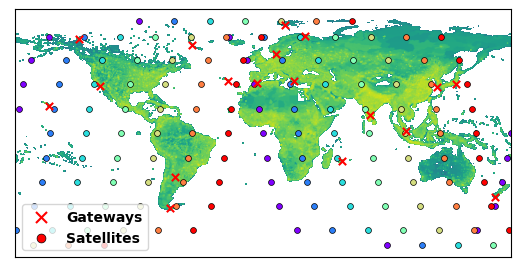

In [7]:
earth.plotMap(True, True)
plt.savefig('popMap_{}.pdf'.format(rKM), dpi = 500)
plt.show()